In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## As healthcare workers across the world put their own lives at risk in this fight against the coronavirus, our aim was to build applications using data science to help them in this fight. The novel covid-19 virus primarily causes respiratory ilnesses, and deep learning can help us detect the severity of the disease in the lungs.![alt text](https://images.radio.com/wwbxfm/doctors.jpg?width=775&height=515&crop=5000,3310,x0,y229)

To run this notebook on colab, upload the entire Final_Project folder on your drive. (My Drive)

In [0]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import shutil
import os
from torch.autograd import Variable
import imageio
import sys
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image, ImageOps
import scipy.ndimage as ndi
# from tqdm import tqdm_notebook as tqdm
from tqdm.notebook import tqdm

import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
import torchvision.transforms as transforms
from torchvision.models import inception_v3
from torch import optim
import os,torchvision
# import torch.optim as 
import torch.nn.functional as F

import matplotlib.pyplot as plt 


In [27]:
#making sure the GPU memory has space
!nvidia-smi

Thu Apr 23 02:29:56 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.64.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   58C    P0    24W /  75W |   4635MiB /  7611MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [4]:
ls

drive/  sample_data/


#Sample image of the X-ray that we will be classifying as either VIRAL PNEUMONIA, NORMAL or BACTERIAL PNEUMONIA
#![alt text](https://storage.googleapis.com/kagglesdsdata/datasets/562468/1022626/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/test/IM-0001-0001.jpeg?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1587820400&Signature=NwWzO2ZOdew1t%2F%2FWWRMBySOoLqFHO1siB9Hym2rdJOAcMOEzsXPwfUe%2B7pFR0OTX9HJRnaxvZbBPupxW%2BwuPWSlkPC%2BNSMLP2AEJjEcl6oVd6G%2F1gQIfOhPFAzknQk92fw7%2Fr2isP9Y0LmeoIXgOmxVmsZ3BRlzVp7J8Av3ETeSqLazN9HFpOx4UMm4ssEiHzEj3CsieVoMYOIve2%2FhmDMbc60YZs1FG4%2FudOpa3mgrdy%2BgivbjyciksVLsM60hyDnKI0OXes%2BF1l7JnKCN1tWbJvqQpWwUqjrAiLOC%2B7dFCmOzUbp17P0IF5kBu1x5%2BBe9xk0k%2BLxWuHZXAnSsffw%3D%3D)

In [5]:

!ls drive/My\ Drive/Final_Project/
dataset_path = "drive/My\ Drive/Final_Project/"

COVID-draft.ipynb		      resnet18_10_0.6762820482254028.model
COVID-Xray-Dataset		      resnet18_11_0.7692307829856873.model
data				      resnet18_17_0.7868589758872986.model
fastai-pneumonia.ipynb		      resnet18_20_0.7740384936332703.model
nn_model_0_0.620192289352417.model    resnet18_21_0.7788461446762085.model
nn_model_10_0.6586538553237915.model  resnet18_23_0.7852564454078674.model
nn_model_13_0.6618589758872986.model  resnet18_27_0.7868589758872986.model
nn_model_15_0.6939102411270142.model  resnet18_30_0.7756410241127014.model
nn_model_19_0.7003205418586731.model  resnet18_34_0.7852564454078674.model
nn_model_20_0.697115421295166.model   resnet50_20.model
nn_model_21_0.7227564454078674.model  resnet50_25.model
nn_model_25_0.7355769276618958.model  resnet50_8.model
nn_model_30_0.6522436141967773.model  resnet50_model_0.model
nn_model_31_0.6586538553237915.model  resnet50_model_4.model
nn_model_32_0.6746795177459717.model  resnet50_model_6.model
nn_model_33_0.7179487347602844.m

In [6]:
cd drive/My\ Drive/

/content/drive/My Drive


In [7]:
cd Final_Project/

/content/drive/My Drive/Final_Project


## Data Segregation into Train and Test folders using the meta data csv

Don't run the cells in this section. Train and Test set Folders have already been generated.

In [0]:
import os
datapath = "COVID-Xray-Dataset/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/"
print(os.listdir())
os.listdir()

['COVID-Xray-Dataset', 'data', 'xRayModel_3.model', 'xRayModel_3_0.0005.model', 'xRayModel_resnet50_2.model', 'resnet50_8.model', 'resnet50_20.model', 'resnet50_25.model', 'resnet50_model_0.model', 'resnet50_model_4.model', 'resnet50_model_6.model', 'nn_model_0_0.620192289352417.model', 'nn_model_4_0.6362179517745972.model', 'nn_model_8_0.6378205418586731.model', 'nn_model_9_0.6602564454078674.model', 'nn_model_10_0.6586538553237915.model', 'nn_model_13_0.6618589758872986.model', 'nn_model_15_0.6939102411270142.model', 'nn_model_19_0.7003205418586731.model', 'nn_model_20_0.697115421295166.model', 'nn_model_21_0.7227564454078674.model', 'nn_model_25_0.7355769276618958.model', 'nn_model_30_0.6522436141967773.model', 'nn_model_31_0.6586538553237915.model', 'nn_model_32_0.6746795177459717.model', 'nn_model_33_0.7179487347602844.model', 'resnet18_10_0.6762820482254028.model', 'resnet18_11_0.7692307829856873.model', 'resnet18_17_0.7868589758872986.model', 'resnet18_20_0.7740384936332703.mode

['COVID-Xray-Dataset',
 'data',
 'xRayModel_3.model',
 'xRayModel_3_0.0005.model',
 'xRayModel_resnet50_2.model',
 'resnet50_8.model',
 'resnet50_20.model',
 'resnet50_25.model',
 'resnet50_model_0.model',
 'resnet50_model_4.model',
 'resnet50_model_6.model',
 'nn_model_0_0.620192289352417.model',
 'nn_model_4_0.6362179517745972.model',
 'nn_model_8_0.6378205418586731.model',
 'nn_model_9_0.6602564454078674.model',
 'nn_model_10_0.6586538553237915.model',
 'nn_model_13_0.6618589758872986.model',
 'nn_model_15_0.6939102411270142.model',
 'nn_model_19_0.7003205418586731.model',
 'nn_model_20_0.697115421295166.model',
 'nn_model_21_0.7227564454078674.model',
 'nn_model_25_0.7355769276618958.model',
 'nn_model_30_0.6522436141967773.model',
 'nn_model_31_0.6586538553237915.model',
 'nn_model_32_0.6746795177459717.model',
 'nn_model_33_0.7179487347602844.model',
 'resnet18_10_0.6762820482254028.model',
 'resnet18_11_0.7692307829856873.model',
 'resnet18_17_0.7868589758872986.model',
 'resnet

In [0]:
print(os.listdir("COVID-Xray-Dataset/pneumonia_dataset/train/Normal"))
print(os.listdir("COVID-Xray-Dataset/pneumonia_dataset/test/Normal"))

['IM-0289-0001.jpeg', 'IM-0357-0001.jpeg', 'IM-0413-0001.jpeg', 'IM-0459-0001.jpeg', 'IM-0493-0001.jpeg', 'IM-0502-0001.jpeg', 'IM-0517-0001.jpeg', 'IM-0521-0001.jpeg', 'IM-0533-0001.jpeg', 'IM-0553-0001.jpeg', 'IM-0557-0001.jpeg', 'IM-0582-0001.jpeg', 'IM-0618-0001.jpeg', 'IM-0643-0001.jpeg', 'IM-0652-0001.jpeg', 'IM-0666-0001.jpeg', 'IM-0670-0001.jpeg', 'IM-0684-0001.jpeg', 'IM-0734-0001.jpeg', 'IM-0766-0001.jpeg', 'NORMAL2-IM-0480-0001.jpeg', 'NORMAL2-IM-0516-0001.jpeg', 'NORMAL2-IM-0525-0001.jpeg', 'NORMAL2-IM-0530-0001.jpeg', 'NORMAL2-IM-0555-0001-0001.jpeg', 'NORMAL2-IM-0555-0001-0002.jpeg', 'NORMAL2-IM-0587-0001-0001.jpeg', 'NORMAL2-IM-0587-0001-0002.jpeg', 'NORMAL2-IM-0621-0001.jpeg', 'NORMAL2-IM-0651-0001.jpeg', 'NORMAL2-IM-0693-0001.jpeg', 'NORMAL2-IM-0702-0001.jpeg', 'NORMAL2-IM-0818-0001-0002.jpeg', 'NORMAL2-IM-0834-0001.jpeg', 'NORMAL2-IM-0846-0001.jpeg', 'NORMAL2-IM-0899-0001.jpeg', 'NORMAL2-IM-0911-0001.jpeg', 'NORMAL2-IM-0994-0001.jpeg', 'NORMAL2-IM-1018-0001.jpeg', 'NO

In [0]:
def copy_img(src_path,dst_path):
    try:
        shutil.copy(src_path, dst_path)
        stmt ='File Copied'
    except IOError as e:
        print('Unable to copy file {} to {}'
              .format(src_path, dst_path))
        stmt ='Copy Failed - IO Error'
    except:
        print('When try copy file {} to {}, unexpected error: {}'
              .format(src_path, dst_path, sys.exc_info()))
        stmt ='Copy Failed - other Error'+ sys.exc_info()
        
    return stmt 

In [0]:
data_dir="COVID-Xray-Dataset/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/"
# data_dir="COVID-Xray-Dataset/pneumonia/"
metadata_path="COVID-Xray-Dataset"

In [0]:
train_dir = os.path.join(data_dir, 'train')
test_dir = os.path.join(data_dir, 'test')

In [0]:
meta_data = pd.read_csv(metadata_path+'/Chest_xray_Corona_Metadata.csv')
meta_data[meta_data["Label"] == "Pnemonia"]

,Unnamed: 0,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category
1341,1341,person101_virus_188.jpeg,Pnemonia,TRAIN,NaN,Virus
1342,1342,person101_virus_187.jpeg,Pnemonia,TRAIN,NaN,Virus
1343,1343,person1019_virus_1708.jpeg,Pnemonia,TRAIN,NaN,Virus
1344,1344,person1019_virus_1707.jpeg,Pnemonia,TRAIN,NaN,Virus
1345,1345,person1019_bacteria_2950.jpeg,Pnemonia,TRAIN,NaN,bacteria
...,...,...,...,...,...,...
5905,5928,person1637_virus_2834.jpeg,Pnemonia,TEST,NaN,Virus
5906,5929,person1635_virus_2831.jpeg,Pnemonia,TEST,NaN,Virus
5907,5930,person1634_virus_2830.jpeg,Pnemonia,TEST,NaN,Virus
5908,5931,person1633_virus_2829.jpeg,Pnemonia,TEST,NaN,Virus


In [0]:
train_dir

'COVID-Xray-Dataset/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train'

In [0]:
meta_data['File_path']=''
meta_data.loc[meta_data['Dataset_type']=='TRAIN','File_path']=train_dir+'/'
meta_data.loc[meta_data['Dataset_type']=='TEST','File_path']=test_dir+'/'

In [0]:
meta_data['X_ray_img_nm_path']=meta_data['File_path']+meta_data['X_ray_image_name']

In [0]:
meta_data["Label"]

0         Normal
1         Normal
2         Normal
3         Normal
4         Normal
          ...   
5905    Pnemonia
5906    Pnemonia
5907    Pnemonia
5908    Pnemonia
5909    Pnemonia
Name: Label, Length: 5910, dtype: object

**FILTER META_DATA DF**

In [0]:
# replace NaN in Label_1_Virus_category column

meta_data['Label_1_Virus_category'].fillna('Normal', inplace=True)

In [0]:
meta_COVID_19_train = meta_data[(meta_data['Dataset_type']=='TRAIN') & ((meta_data['Label']=='Normal')|(meta_data['Label']=='Pnemonia') & ((meta_data['Label_1_Virus_category']=='Normal')| (meta_data['Label_1_Virus_category']=='Virus')| (meta_data['Label_1_Virus_category']=='bacteria')))]
 
meta_COVID_19_test = meta_data[(meta_data['Dataset_type']=='TEST') & ((meta_data['Label']=='Normal')|(meta_data['Label']=='Pnemonia') & ((meta_data['Label_1_Virus_category']=='Normal')| (meta_data['Label_1_Virus_category']=='Virus')| (meta_data['Label_1_Virus_category']=='bacteria')))]

# meta_COVID_19_train = meta_data[(meta_data['Dataset_type']=='TRAIN') & ((meta_data['Label']=='Normal')|(meta_data['Label']=='Pnemonia') )]
 
# meta_COVID_19_test = meta_data[(meta_data['Dataset_type']=='TEST') & ((meta_data['Label']=='Normal')|(meta_data['Label']=='Pnemonia') )]





# meta_COVID_19_test = meta_data[(meta_data['Dataset_type']=='TEST') & ((meta_data['Label']=='Normal')|(meta_data['Label']=='Pnemonia') & ((meta_data['Label_1_Virus_category']=='Normal')| (meta_data['Label_1_Virus_category']=='Virus')| (meta_data['Label_1_Virus_category']=='bacteria'))]


In [0]:
meta_COVID_19_test

,Unnamed: 0,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category,File_path,X_ray_img_nm_path
5286,5309,IM-0021-0001.jpeg,Normal,TEST,NaN,Normal,COVID-Xray-Dataset/Coronahack-Chest-XRay-Datas...,COVID-Xray-Dataset/Coronahack-Chest-XRay-Datas...
5287,5310,IM-0019-0001.jpeg,Normal,TEST,NaN,Normal,COVID-Xray-Dataset/Coronahack-Chest-XRay-Datas...,COVID-Xray-Dataset/Coronahack-Chest-XRay-Datas...
5288,5311,IM-0017-0001.jpeg,Normal,TEST,NaN,Normal,COVID-Xray-Dataset/Coronahack-Chest-XRay-Datas...,COVID-Xray-Dataset/Coronahack-Chest-XRay-Datas...
5289,5312,IM-0016-0001.jpeg,Normal,TEST,NaN,Normal,COVID-Xray-Dataset/Coronahack-Chest-XRay-Datas...,COVID-Xray-Dataset/Coronahack-Chest-XRay-Datas...
5290,5313,IM-0015-0001.jpeg,Normal,TEST,NaN,Normal,COVID-Xray-Dataset/Coronahack-Chest-XRay-Datas...,COVID-Xray-Dataset/Coronahack-Chest-XRay-Datas...
...,...,...,...,...,...,...,...,...
5905,5928,person1637_virus_2834.jpeg,Pnemonia,TEST,NaN,Virus,COVID-Xray-Dataset/Coronahack-Chest-XRay-Datas...,COVID-Xray-Dataset/Coronahack-Chest-XRay-Datas...
5906,5929,person1635_virus_2831.jpeg,Pnemonia,TEST,NaN,Virus,COVID-Xray-Dataset/Coronahack-Chest-XRay-Datas...,COVID-Xray-Dataset/Coronahack-Chest-XRay-Datas...
5907,5930,person1634_virus_2830.jpeg,Pnemonia,TEST,NaN,Virus,COVID-Xray-Dataset/Coronahack-Chest-XRay-Datas...,COVID-Xray-Dataset/Coronahack-Chest-XRay-Datas...
5908,5931,person1633_virus_2829.jpeg,Pnemonia,TEST,NaN,Virus,COVID-Xray-Dataset/Coronahack-Chest-XRay-Datas...,COVID-Xray-Dataset/Coronahack-Chest-XRay-Datas...


In [0]:
# meta_COVID_19_train = meta_data[(meta_data['Dataset_type']=='TRAIN') & 
#                         ((meta_data['Label']=='Normal')|(meta_data['Label']=='Pnemonia') & ((meta_data['Label_2_Virus_category']=='COVID-19')) )]


# meta_COVID_19_test = meta_data[(meta_data['Dataset_type']=='TEST') & 
#                         ((meta_data['Label']=='Normal')|(meta_data['Label']=='Pnemonia') & (meta_data['Label_2_Virus_category']=='COVID-19'))]


## Moving the 10 Corona Infected dataset to Test

# meta_data_covid_test = meta_data[meta_data['Label_2_Virus_category']=='COVID-19'].sample(12)
meta_COVID_19_train = meta_COVID_19_train[~meta_COVID_19_train['X_ray_image_name'].isin(meta_data_covid_test['X_ray_image_name'])]
meta_COVID_19_test_fnl = pd.concat([meta_data_covid_test,meta_COVID_19_test],ignore_index=False)

In [0]:
# rename Label_1_Virus_category to LABEL
meta_COVID_19_train = meta_COVID_19_train.rename(columns={'Label_1_Virus_category': 'LABEL'})
meta_COVID_19_test = meta_COVID_19_test.rename(columns={'Label_1_Virus_category': 'LABEL'})

# meta_COVID_19_train.loc[meta_COVID_19_train['Label'] =='Pnemonia','Label']='COVID19'
# meta_COVID_19_test_fnl.loc[meta_COVID_19_test_fnl['Label'] =='Pnemonia','Label']='COVID19'

In [0]:
print("===============Train Set==========================\n")
print(meta_COVID_19_train.groupby(['LABEL']).agg({'Dataset_type':'count'}))

print("\n===============Test Set==========================\n")
print(meta_COVID_19_test.groupby(['LABEL']).agg({'Dataset_type':'count'}))

===============Train Set==========================

          Dataset_type
LABEL                 
Normal            1342
Virus             1407
bacteria          2535

===============Test Set==========================

          Dataset_type
LABEL                 
Normal             234
Virus              148
bacteria           242


IGNORE





In [0]:

# replace NaN in Label_1_Virus_category column

meta_data['Label_1_Virus_category'].fillna('Normal', inplace=True)

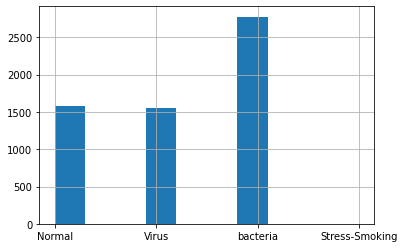

In [0]:

meta_data['Label_1_Virus_category'].hist()

In [0]:
meta_data[meta_data['Label_1_Virus_category'] == "bacteria"]

In [0]:
meta_COVID_19_train['Img_tgt_path']="COVID-Xray-Dataset/pneumonia/train/"
meta_COVID_19_test['Img_tgt_path']="COVID-Xray-Dataset/pneumonia/test"

In [0]:
meta_COVID_19_train.loc[meta_COVID_19_train['LABEL']=='Normal','Img_tgt_path']=meta_COVID_19_train['Img_tgt_path']+'Normal/'
meta_COVID_19_train.loc[meta_COVID_19_train['LABEL']=='bacteria','Img_tgt_path']=meta_COVID_19_train['Img_tgt_path']+'Bacteria/'
meta_COVID_19_train.loc[meta_COVID_19_train['LABEL']=='Virus','Img_tgt_path']=meta_COVID_19_train['Img_tgt_path']+'Virus/'

meta_COVID_19_test.loc[meta_COVID_19_test['LABEL']=='Normal','Img_tgt_path']=meta_COVID_19_test['Img_tgt_path']+'Normal/'
meta_COVID_19_test.loc[meta_COVID_19_test['LABEL']=='bacteria','Img_tgt_path']=meta_COVID_19_test['Img_tgt_path']+'Bacteria/'
meta_COVID_19_test.loc[meta_COVID_19_test['LABEL']=='Virus','Img_tgt_path']=meta_COVID_19_test['Img_tgt_path']+'Virus/'

In [0]:
meta_COVID_19_train

,Unnamed: 0,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,LABEL,File_path,X_ray_img_nm_path,Img_tgt_path
0,0,IM-0128-0001.jpeg,Normal,TRAIN,NaN,Normal,COVID-Xray-Dataset/Coronahack-Chest-XRay-Datas...,COVID-Xray-Dataset/Coronahack-Chest-XRay-Datas...,COVID-Xray-Dataset/pneumonia/train/Normal/
1,1,IM-0127-0001.jpeg,Normal,TRAIN,NaN,Normal,COVID-Xray-Dataset/Coronahack-Chest-XRay-Datas...,COVID-Xray-Dataset/Coronahack-Chest-XRay-Datas...,COVID-Xray-Dataset/pneumonia/train/Normal/
2,2,IM-0125-0001.jpeg,Normal,TRAIN,NaN,Normal,COVID-Xray-Dataset/Coronahack-Chest-XRay-Datas...,COVID-Xray-Dataset/Coronahack-Chest-XRay-Datas...,COVID-Xray-Dataset/pneumonia/train/Normal/
3,3,IM-0122-0001.jpeg,Normal,TRAIN,NaN,Normal,COVID-Xray-Dataset/Coronahack-Chest-XRay-Datas...,COVID-Xray-Dataset/Coronahack-Chest-XRay-Datas...,COVID-Xray-Dataset/pneumonia/train/Normal/
4,4,IM-0119-0001.jpeg,Normal,TRAIN,NaN,Normal,COVID-Xray-Dataset/Coronahack-Chest-XRay-Datas...,COVID-Xray-Dataset/Coronahack-Chest-XRay-Datas...,COVID-Xray-Dataset/pneumonia/train/Normal/
...,...,...,...,...,...,...,...,...,...
5281,5304,1-s2.0-S0929664620300449-gr2_lrg-c.jpg,Pnemonia,TRAIN,COVID-19,Virus,COVID-Xray-Dataset/Coronahack-Chest-XRay-Datas...,COVID-Xray-Dataset/Coronahack-Chest-XRay-Datas...,COVID-Xray-Dataset/pneumonia/train/Virus/
5282,5305,1-s2.0-S0929664620300449-gr2_lrg-b.jpg,Pnemonia,TRAIN,COVID-19,Virus,COVID-Xray-Dataset/Coronahack-Chest-XRay-Datas...,COVID-Xray-Dataset/Coronahack-Chest-XRay-Datas...,COVID-Xray-Dataset/pneumonia/train/Virus/
5283,5306,1-s2.0-S0929664620300449-gr2_lrg-a.jpg,Pnemonia,TRAIN,COVID-19,Virus,COVID-Xray-Dataset/Coronahack-Chest-XRay-Datas...,COVID-Xray-Dataset/Coronahack-Chest-XRay-Datas...,COVID-Xray-Dataset/pneumonia/train/Virus/
5284,5307,1-s2.0-S0140673620303706-fx1_lrg.jpg,Pnemonia,TRAIN,COVID-19,Virus,COVID-Xray-Dataset/Coronahack-Chest-XRay-Datas...,COVID-Xray-Dataset/Coronahack-Chest-XRay-Datas...,COVID-Xray-Dataset/pneumonia/train/Virus/


**MOVE FILES TO SEPERATE PATHS FOR CLASSIFICATION**

In [0]:
ls

COVID-draft.ipynb  COVID-Xray-Dataset/  data/


In [0]:
# meta_COVID_19_train['Move_status'] = np.vectorize(copy_img)(meta_COVID_19_train['X_ray_img_nm_path'],meta_COVID_19_train['Img_tgt_path'])
# meta_COVID_19_test['Move_status'] = np.vectorize(copy_img)(meta_COVID_19_test['X_ray_img_nm_path'],meta_COVID_19_test['Img_tgt_path'])

PyTorch

In [0]:
def plot_imgs(item_dir, num_imgs=25):
    all_item_dirs = os.listdir(item_dir)
    item_files = [os.path.join(item_dir, file) for file in all_item_dirs][:num_imgs]

    plt.figure(figsize=(10, 10))
    for idx, img_path in enumerate(item_files):
        plt.subplot(5, 5, idx+1)

        img = plt.imread(img_path)
        plt.imshow(img)

    plt.tight_layout()

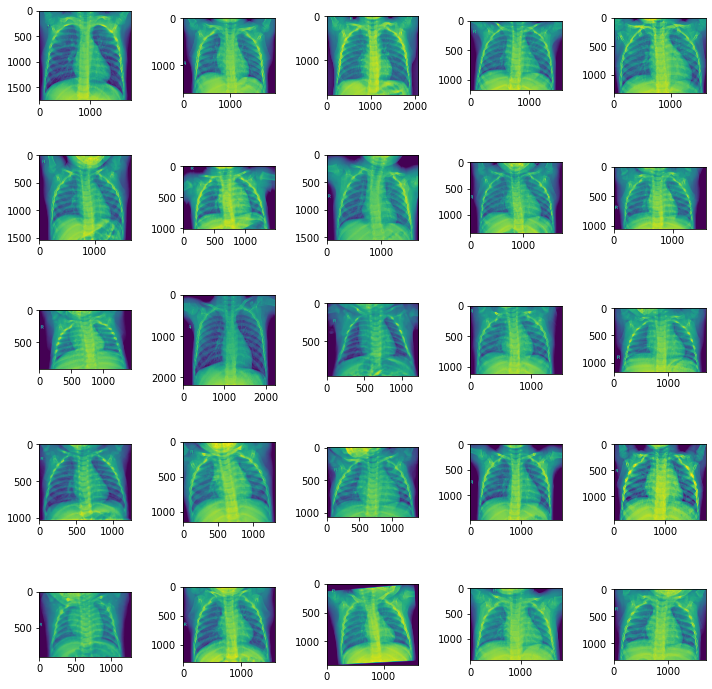

In [0]:
plot_imgs("COVID-Xray-Dataset/pneumonia/train/Normal/")

#Deep learning

![alt text](https://lh3.googleusercontent.com/proxy/JgDbQ7oLcHOzySvG82OjKEyo-XCieBNfJBxwo_QitGHNc5zZTjnWtc1QKQ8LV-dtpLiTLzI4x12-p-S8bsHvUMmkYDTb8noAN5_wSyOPxaDhnQ)

# Deep learning, as the name suggests has many layers through which the images go through before learning and prediction happens. But there's a problem....

# Load Dataset with transforms
###Tranformations applied : Resize, Normalize, converting to Tensor.

In [0]:
import torch
from torchvision import datasets, transforms

In [0]:
def load_dataset(data_path):

    train_dataset = torchvision.datasets.ImageFolder(
        root=data_path,
        transform=transform
    )
    train_loader = torch.utils.data.DataLoader(
        train_dataset,
        batch_size=16,
        num_workers=0,
        shuffle=True
    )
    return train_loader

normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])

# 224,224
transform = transforms.Compose([transforms.Resize([224,224]),
                                transforms.ToTensor(),
                                normalize])

In [0]:
train_loader = load_dataset("COVID-Xray-Dataset/pneumonia/train/")
test_loader = load_dataset("COVID-Xray-Dataset/pneumonia/test/")

In [25]:
# (next(iter(train_loader))[1])
len(test_loader.dataset)


120

## Approach 1 - Train a Neural Network from scratch 
Architecture

In [0]:
class Unit(nn.Module):
    def __init__(self,in_channels,out_channels):
        super(Unit,self).__init__()
        

        self.conv = nn.Conv2d(in_channels=in_channels,kernel_size=3,out_channels=out_channels,stride=1,padding=1)
        self.bn = nn.BatchNorm2d(num_features=out_channels)
        self.relu = nn.ReLU()

    def forward(self,input):
        output = self.conv(input)
        output = self.bn(output)
        output = self.relu(output)

        return output

class NN_Model(nn.Module):
    def __init__(self,num_classes=2):
        super(NN_Model,self).__init__()
        
        #Create 14 layers of the unit with max pooling in between
        self.unit1 = Unit(in_channels=3,out_channels=32)
        self.unit2 = Unit(in_channels=32, out_channels=32)
        self.unit3 = Unit(in_channels=32, out_channels=32)

        self.pool1 = nn.MaxPool2d(kernel_size=2)

        self.unit4 = Unit(in_channels=32, out_channels=64)
        self.unit5 = Unit(in_channels=64, out_channels=64)
        self.unit6 = Unit(in_channels=64, out_channels=64)
        self.unit7 = Unit(in_channels=64, out_channels=64)

        self.pool2 = nn.MaxPool2d(kernel_size=2)

        self.unit8 = Unit(in_channels=64, out_channels=128)
        self.unit9 = Unit(in_channels=128, out_channels=128)
        self.unit10 = Unit(in_channels=128, out_channels=128)
        self.unit11 = Unit(in_channels=128, out_channels=128)

        self.pool3 = nn.MaxPool2d(kernel_size=2)

        self.unit12 = Unit(in_channels=128, out_channels=128)
        self.unit13 = Unit(in_channels=128, out_channels=128)
        self.unit14 = Unit(in_channels=128, out_channels=128)

        self.pool4 = nn.MaxPool2d(kernel_size=2)

        self.unit15 = Unit(in_channels=128, out_channels=256)
        self.unit16 = Unit(in_channels=256, out_channels=256)
        self.unit17 = Unit(in_channels=256, out_channels=256)

        self.pool5 = nn.MaxPool2d(kernel_size=2)

        self.unit18 = Unit(in_channels=256, out_channels=256)
        self.unit19 = Unit(in_channels=256, out_channels=256)
        self.unit20 = Unit(in_channels=256, out_channels=256)

        self.avgpool = nn.AvgPool2d(kernel_size=4)
        
        #Add all the units into the Sequential layer in exact order
        self.net = nn.Sequential(self.unit1, self.unit2, self.unit3, self.pool1, self.unit4, self.unit5, self.unit6
                                  ,self.unit7, self.pool2, self.unit8, self.unit9, self.unit10, self.unit11, self.pool3,
                                  self.unit12, self.unit13, self.unit14, self.pool4, self.unit15,self.unit16,self.unit17,  self.avgpool)

        self.fc = nn.Linear(in_features=256*3*3,out_features=num_classes)

    def forward(self, input):
        output = self.net(input)
        # print(output.shape)

        # output = output.view(-1,128*7*7)
        output = output.view(-1,256*3*3)
        
        output = self.fc(output)
        return output


nn_model = NN_Model(3)
# model.to(device)

In [0]:
torch.cuda.empty_cache()

In [0]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
nn_model.to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=nn_model.parameters(), lr = 0.001, weight_decay=0.001)


## Training function

Trains and verifies the model with test data

In [0]:
from torch.autograd import Variable
def test(model):
    model.eval()
    test_acc = 0.0
    for i, (images, labels) in enumerate(test_loader):

        if torch.cuda.is_available():
            images = Variable(images.cuda())
            labels = Variable(labels.cuda())

        # Predict classes using images from the test set
        outputs = model(images)
        _, prediction = torch.max(outputs.data, 1)
        
        test_acc += torch.sum(prediction == labels.data)

    # Compute the average acc and loss over all 10000 test images
    test_acc = test_acc / len(test_loader.dataset) 
    print("Accuracy of the model on the test set ---->{}".format(test_acc))
    return test_acc

def adjust_learning_rate(epoch):

    lr = 0.001

    if epoch > 20:
        lr = lr / 100000
    elif epoch > 15:
        lr = lr / 10000
    elif epoch > 12:
        lr = lr / 1000
    elif epoch > 8:
        lr = lr / 100
    elif epoch > 5:
        lr = lr / 10

    for param_group in optimizer.param_groups:
        param_group["lr"] = lr


def save_models(epoch,test_acc,model):
    # print(os.listdir())
    # os.mkdir("pneumonia_models")
    # print(os.listdir())
    torch.save(model.state_dict(), "pneumonia_models/resnet34_finetuned_{}_{}.model".format(epoch,test_acc))
    print("Checkpoint saved","___nn_model_3{}_{}.model".format(epoch,test_acc))

def train(train_loader,test_loader, num_epochs, model):
    best_acc = 0.0
    loss_values = []
    outer = tqdm(total=num_epochs, desc='Epoch', position=0)
    for epoch in tqdm(range(num_epochs)):
        model.train()
        train_acc = 0.0
        train_loss = 0.0

        inner = tqdm(total=len(train_loader), desc='Batch', position=1)
        for i, (images, labels) in enumerate(train_loader):
            # Move images and labels to gpu if available
            if torch.cuda.is_available():
                images = Variable(images.cuda())
                labels = Variable(labels.cuda())

            # Clear all accumulated gradients
            optimizer.zero_grad()
            # Predict classes using images from the test set
            outputs = model(images)
            # Compute the loss based on the predictions and actual labels
            loss = loss_fn(outputs, labels)
            # Backpropagate the loss
            loss.backward()

            # Adjust parameters according to the computed gradients
            optimizer.step()

            train_loss += loss.cpu().data * images.size(0)
            _, prediction = torch.max(outputs.data, 1)
            loss_values.append(train_loss)
            
            train_acc += torch.sum(prediction == labels.data)
            inner.update(1)

        outer.update(1)
        # Call the learning rate adjustment function
        adjust_learning_rate(epoch)

        # Compute the average acc and loss over all training images
        train_acc = train_acc / len(train_loader.dataset)
        train_loss = train_loss / len(train_loader.dataset)

        # Evaluate on the test set
        test_acc = test(model)

        # Save the model if the test acc is greater than our current best
        if test_acc > best_acc:
            print("better accuracy-->",test_acc)
            save_models(epoch,test_acc,model)
            best_acc = test_acc

        # Print the metrics
        print("Epoch {}, Train Accuracy: {} , TrainLoss: {} , Test Accuracy: {}".format(epoch, train_acc, train_loss,test_acc))
    plt.plot(np.array(loss_values))
    return model



In [0]:
##uncomment below line to train the model

# model = train(train_loader,test_loader,20,nn_model)

In [15]:
#loading the model we already trained
nn_model.load_state_dict(torch.load("nn_model_25_0.7355769276618958.model"))
nn_model.to(device)



NN_Model(
  (unit1): Unit(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU()
  )
  (unit2): Unit(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU()
  )
  (unit3): Unit(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU()
  )
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (unit4): Unit(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU()
  )
  (unit5): Unit(
    (conv): Conv2d(64, 64, kernel_size=(3, 3), stride=(1

In [0]:
test(nn_model)

Accuracy of the test set ---->0.7355769276618958


tensor(0.7356, device='cuda:0')

# But there's a problem...

![alt text](https://media-exp1.licdn.com/dms/image/C5112AQHrYKvRUhP5xw/article-cover_image-shrink_423_752/0?e=1593043200&v=beta&t=SFEc4yCI0ZCYwQ51eMirChAURFklbUsGx4OprmtOPrI)

# Vanishing gradients...the real culprit

# One of the solutions: Using Residual Networks

![alt text](https://miro.medium.com/max/1140/1*D0F3UitQ2l5Q0Ak-tjEdJg.png)

## Approach 2 - Transfer Learning - Resnet34 pretrained on ImageNet Dataset
The ImageNet dataset is a very large collection of human annotated photographs designed by academics for developing computer vision algorithms.

> Indented block



![alt text](https://gluon-cv.mxnet.io/_images/imagenet_banner.jpeg)

We load a pre-trained model with resnet34 architecture pretrained on ImageNet dataset

**Transfer Learning**

Transfer learning make use of the knowledge gained while solving one problem and applying it to a different but related problem.

We can perform this by doing the following steps:


1.   Load a pre-trained model
2.   Freeze the weights(parameters) of all the layers but the last fully connected layer.
3.   Train the code  




![alt text](https://miro.medium.com/max/1204/1*TVu5hyywTrUsCAkfJbVHQw.png)

In [28]:
import torchvision.models as models
resnet34 = models.resnet34(pretrained=True)

#freezing the weights of every layer in the network
for pram in resnet34.parameters():
    pram.requires_grad = False
# resnet18

#except for the last layer
for pram in resnet34.fc.parameters():
    pram.requires_grad = True


last_layer_input = resnet34.fc.in_features
print(last_layer_input)

replaced_last_layer = nn.Linear(in_features=last_layer_input, out_features=3, bias=True)
resnet34.fc = replaced_last_layer

#mount n/w on to GPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
resnet34.to(device)

# function that conveys how close your predictions are to the ground truth(labels).
loss_fn = nn.CrossEntropyLoss()

# torch.optim.
#
optimizer = torch.optim.Adam(params=resnet34.parameters(), lr = 0.001, weight_decay=0.0001)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth



512


In [0]:
optimizer = torch.optim.Adam(params=resnet34.parameters(), lr = 0.0005, weight_decay=0.01)

In [0]:
# #uncomment and run the code to train the model from scratch
# train(train_loader,test_loader,30,resnet34)

In [0]:
resnet34.load_state_dict(torch.load("pneumonia_models/resnet34_pneomonia5_0.8205128312110901.model"))
resnet34.to(device)
test(resnet34)

Accuracy of the test set ---->0.8205128312110901


tensor(0.8205, device='cuda:0')

# Prediction

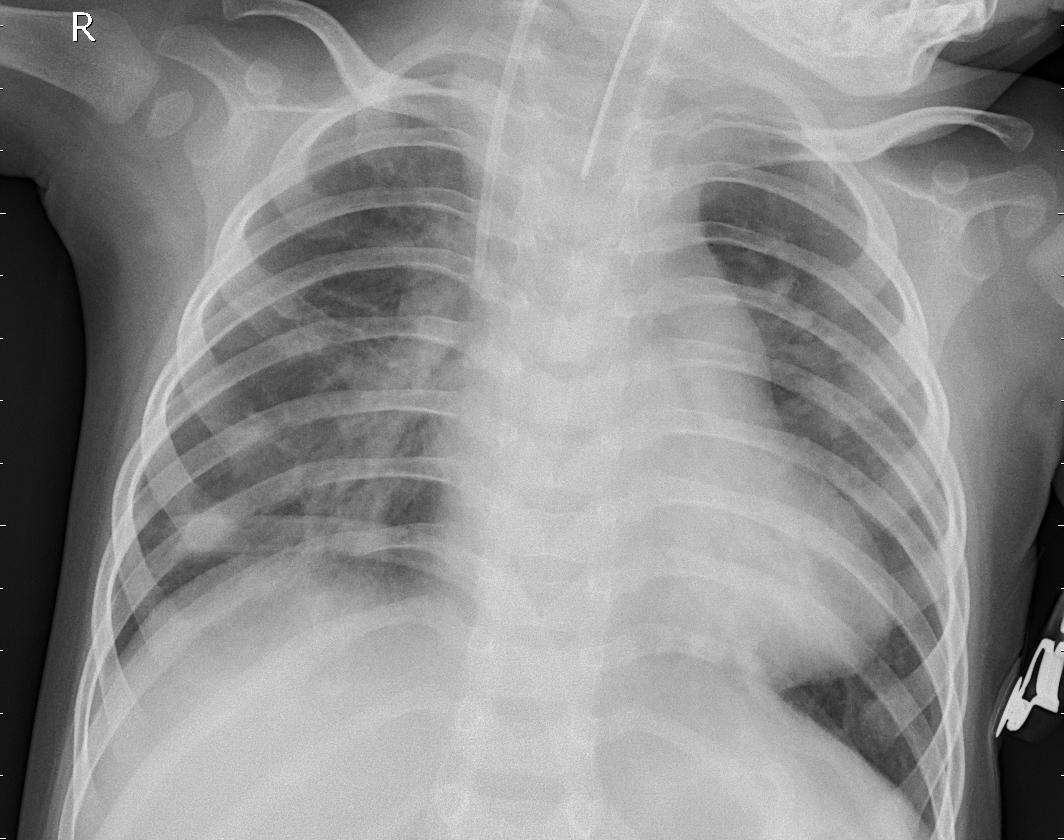

In [0]:
Image.open("COVID-Xray-Dataset/pneumonia/test/Bacteria/"+os.listdir("COVID-Xray-Dataset/pneumonia/test/Bacteria/")[7])


Parse the string containing the image path into image_path varaible to get prediction from the model.

In [0]:
# resnet34.load_state_dict(torch.load("pneumonia_models/resnet34_83.65.model"))B7




resnet34.to(device)
# Bacteria
# Virus
# Normal

image_path = os.listdir("COVID-Xray-Dataset/pneumonia/test/Normal/")[4]
from PIL import Image
Image.open("COVID-Xray-Dataset/pneumonia/test/Normal/"+os.listdir("COVID-Xray-Dataset/pneumonia/test/Normal/")[7])
def predict(image_path):
  image = Image.open(image_path)
  image_tensor = transform(image.convert("RGB")).float()
  image_tensor = image_tensor.unsqueeze_(0).cuda()
  input = Variable(image_tensor)

  output = resnet34(input);output
  index = output.cpu().data.numpy().argmax()
  print(index)
  resultDict = {0: "Bacterial Pneumonia", 1:"Normal", 2:"Viral Pneumonia"}
  return resultDict[index]

predict("COVID-Xray-Dataset/pneumonia/test/Normal/" + image_path)

1


'Normal'

In [0]:
image_path = os.listdir("COVID-Xray-Dataset/pneumonia/test/Bacteria/")[8]
from PIL import Image
Image.open("COVID-Xray-Dataset/pneumonia/test/Bacteria/"+os.listdir("COVID-Xray-Dataset/pneumonia/test/Bacteria/")[7])
def predict(image_path):
  image = Image.open(image_path)
  image_tensor = transform(image.convert("RGB")).float()
  image_tensor = image_tensor.unsqueeze_(0).cuda()
  input = Variable(image_tensor)

  output = resnet34(input);output
  index = output.cpu().data.numpy().argmax()
  print(index)
  resultDict = {0: "Bacterial Pneumonia", 1:"Normal", 2:"Viral Pneumonia"}
  return resultDict[index]

predict("COVID-Xray-Dataset/pneumonia/test/Bacteria/" + image_path)

0


'Bacterial Pneumonia'

In [0]:
image_path = os.listdir("COVID-Xray-Dataset/pneumonia/test/Virus/")[8]
from PIL import Image
Image.open("COVID-Xray-Dataset/pneumonia/test/Virus/"+os.listdir("COVID-Xray-Dataset/pneumonia/test/Virus/")[7])
def predict(image_path):
  image = Image.open(image_path)
  image_tensor = transform(image.convert("RGB")).float()
  image_tensor = image_tensor.unsqueeze_(0).cuda()
  input = Variable(image_tensor)

  output = resnet34(input);output
  index = output.cpu().data.numpy().argmax()
  print(index)
  resultDict = {0: "Bacterial Pneumonia", 1:"Normal", 2:"Viral Pneumonia"}
  return resultDict[index]

predict("COVID-Xray-Dataset/pneumonia/test/Virus/" + image_path)

2


'Viral Pneumonia'

In [0]:
len(test_loader.dataset)

624